In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

In [2]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs() 

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


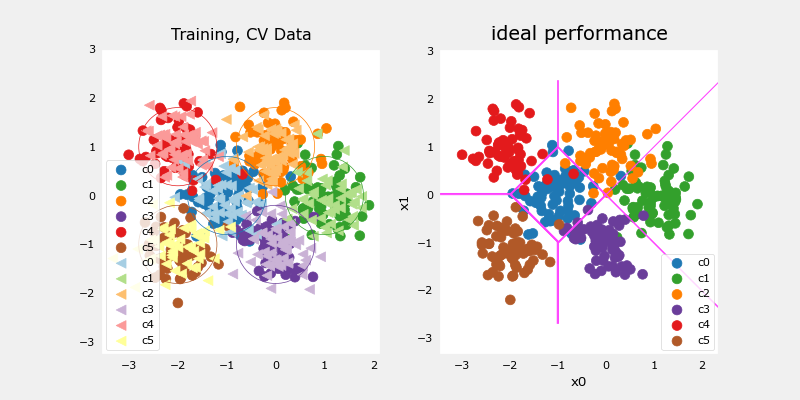

In [3]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

In [10]:
def eval_cal_err(y, yhat):
    m = len(y)
    return len(y[y != yhat]) / m

In [11]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


#### Model Complexity

In [16]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

model = Sequential([
    Dense(120, activation='relu'),
    Dense(40, activation='relu'),
    Dense(6, activation='linear'),
])

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01), metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
13/13 [==============================] - 0s 637us/step - loss: 0.9623 - accuracy: 0.7175
Epoch 2/1000
13/13 [==============================] - 0s 606us/step - loss: 0.3744 - accuracy: 0.8700
Epoch 3/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3046 - accuracy: 0.8825
Epoch 4/1000
13/13 [==============================] - 0s 565us/step - loss: 0.2731 - accuracy: 0.9075
Epoch 5/1000
13/13 [==============================] - 0s 538us/step - loss: 0.2518 - accuracy: 0.9000
Epoch 6/1000
13/13 [==============================] - 0s 566us/step - loss: 0.2539 - accuracy: 0.9200
Epoch 7/1000
13/13 [==============================] - 0s 563us/step - loss: 0.3078 - accuracy: 0.8975
Epoch 8/1000
13/13 [==============================] - 0s 625us/step - loss: 0.2744 - accuracy: 0.9025
Epoch 9/1000
13/13 [==============================] - 0s 609us/step - loss: 0.2633 - accuracy: 0.9050
Epoch 10/1000
13/13 [==============================] - 0s 664us/step - loss: 0.242

1082/1082 [==============================] - 0s 307us/step


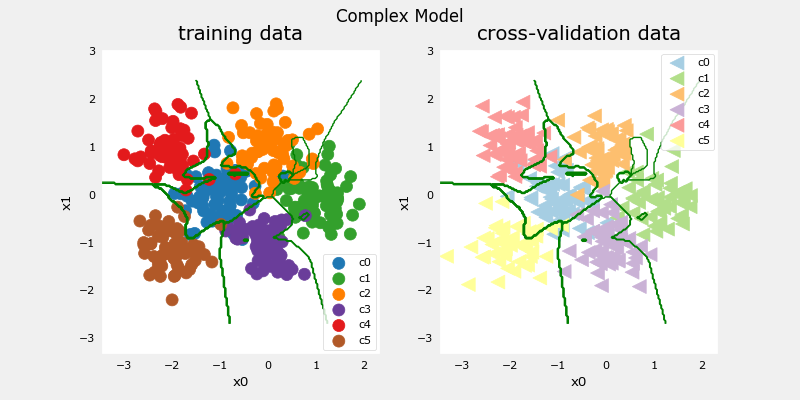

In [24]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [26]:
train_cal_err = eval_cal_err(y_train, model_predict(X_train))
val_cal_err = eval_cal_err(y_cv, model_predict(X_cv))
print(f"Training Classification Error: {train_cal_err}, Validation Classification Err: {val_cal_err}")

10/10 [==============================] - 0s 394us/step
Training Classification Error: 0.01, Validation Classification Err: 0.1


##### Simple Model

In [27]:
tf.random.set_seed(1234)
model_s = Sequential(
    [
        tf.keras.layers.Dense(6, activation="relu"),
        tf.keras.layers.Dense(6, activation="linear")
    ], name = "Simple"
)
model_s.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
)

In [28]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 701us/step - loss: 2.0921
Epoch 2/1000
13/13 [==============================] - 0s 534us/step - loss: 2.0368
Epoch 3/1000
13/13 [==============================] - 0s 526us/step - loss: 1.9858
Epoch 4/1000
13/13 [==============================] - 0s 532us/step - loss: 1.9364
Epoch 5/1000
13/13 [==============================] - 0s 549us/step - loss: 1.8894
Epoch 6/1000
13/13 [==============================] - 0s 478us/step - loss: 1.8452
Epoch 7/1000
13/13 [==============================] - 0s 507us/step - loss: 1.8029
Epoch 8/1000
13/13 [==============================] - 0s 434us/step - loss: 1.7631
Epoch 9/1000
13/13 [==============================] - 0s 443us/step - loss: 1.7247
Epoch 10/1000
13/13 [==============================] - 0s 391us/step - loss: 1.6879
Epoch 11/1000
13/13 [==============================] - 0s 361us/step - loss: 1.6528
Epoch 12/1000
13/13 [==============================] - 0s 432us/step - loss: 1.6189
E

1082/1082 [==============================] - 0s 262us/step


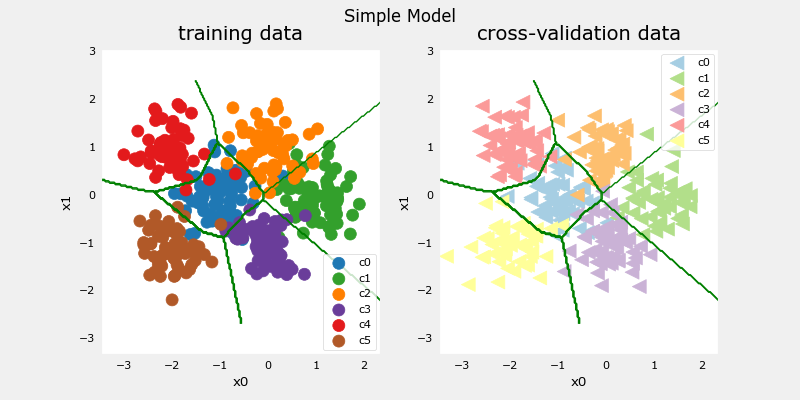

In [29]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

In [32]:
training_cerr_simple = eval_cal_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cal_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {train_cal_err:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {val_cal_err:0.3f}" )

10/10 [==============================] - 0s 372us/step
categorization error, training, simple model, 0.077, complex model: 0.010
categorization error, cv,       simple model, 0.066, complex model: 0.100


#### Regularization

In [34]:
tf.random.set_seed(1234)
model_r = Sequential(
    [

        tf.keras.layers.Dense(120, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(6, activation="linear")

    ], name= None
)
model_r.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
)

In [35]:
model_r.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 730us/step - loss: 7.6198
Epoch 2/1000
13/13 [==============================] - 0s 633us/step - loss: 6.4707
Epoch 3/1000
13/13 [==============================] - 0s 640us/step - loss: 5.5191
Epoch 4/1000
13/13 [==============================] - 0s 569us/step - loss: 4.7322
Epoch 5/1000
13/13 [==============================] - 0s 596us/step - loss: 4.0891
Epoch 6/1000
13/13 [==============================] - 0s 576us/step - loss: 3.5608
Epoch 7/1000
13/13 [==============================] - 0s 559us/step - loss: 3.1324
Epoch 8/1000
13/13 [==============================] - 0s 489us/step - loss: 2.7807
Epoch 9/1000
13/13 [==============================] - 0s 499us/step - loss: 2.4924
Epoch 10/1000
13/13 [==============================] - 0s 510us/step - loss: 2.2547
Epoch 11/1000
13/13 [==============================] - 0s 770us/step - loss: 2.0621
Epoch 12/1000
13/13 [==============================] - 0s 507us/step - loss: 1.9040
E

1082/1082 [==============================] - 0s 296us/step


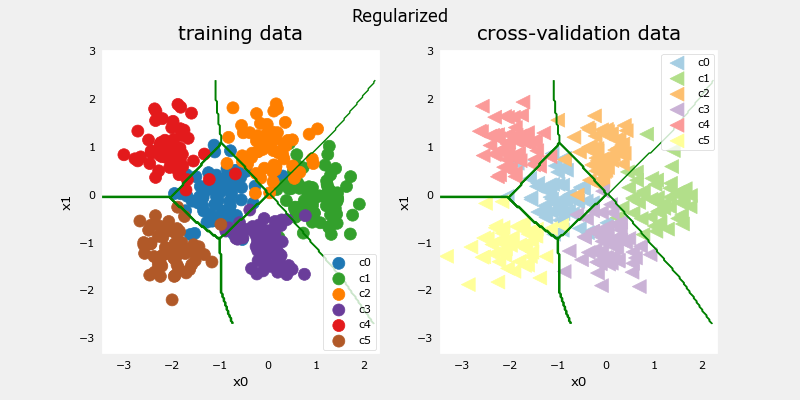

In [36]:
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

In [37]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {train_cal_err:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {val_cal_err:0.3f}" )

3/3 [==============================] - 0s 705us/step
categorization error, training, regularized: 0.072, simple model, 0.077, complex model: 0.010
categorization error, cv,       regularized: 0.069, simple model, 0.066, complex model: 0.100


#### Iterate to find optimal regularization value

In [38]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")

Epoch 1/1000
13/13 [==============================] - 0s 772us/step - loss: 1.0398
Epoch 2/1000
13/13 [==============================] - 0s 596us/step - loss: 0.4051
Epoch 3/1000
13/13 [==============================] - 0s 615us/step - loss: 0.3166
Epoch 4/1000
13/13 [==============================] - 0s 598us/step - loss: 0.2767
Epoch 5/1000
13/13 [==============================] - 0s 620us/step - loss: 0.2648
Epoch 6/1000
13/13 [==============================] - 0s 608us/step - loss: 0.2737
Epoch 7/1000
13/13 [==============================] - 0s 581us/step - loss: 0.2383
Epoch 8/1000
13/13 [==============================] - 0s 485us/step - loss: 0.2197
Epoch 9/1000
13/13 [==============================] - 0s 527us/step - loss: 0.2191
Epoch 10/1000
13/13 [==============================] - 0s 505us/step - loss: 0.2088
Epoch 11/1000
13/13 [==============================] - 0s 511us/step - loss: 0.2216
Epoch 12/1000
13/13 [==============================] - 0s 472us/step - loss: 0.2025
E

Finished lambda = 0.0
Epoch 1/1000
13/13 [==============================] - 0s 676us/step - loss: 1.0556
Epoch 2/1000
13/13 [==============================] - 0s 645us/step - loss: 0.4963
Epoch 3/1000
13/13 [==============================] - 0s 711us/step - loss: 0.3967
Epoch 4/1000
13/13 [==============================] - 0s 615us/step - loss: 0.3618
Epoch 5/1000
13/13 [==============================] - 0s 665us/step - loss: 0.3606
Epoch 6/1000
13/13 [==============================] - 0s 656us/step - loss: 0.3747
Epoch 7/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3166
Epoch 8/1000
13/13 [==============================] - 0s 548us/step - loss: 0.2940
Epoch 9/1000
13/13 [==============================] - 0s 501us/step - loss: 0.2895
Epoch 10/1000
13/13 [==============================] - 0s 527us/step - loss: 0.2678
Epoch 11/1000
13/13 [==============================] - 0s 581us/step - loss: 0.2851
Epoch 12/1000
13/13 [==============================] - 0s 528us

Finished lambda = 0.001
Epoch 1/1000
13/13 [==============================] - 0s 677us/step - loss: 1.5983
Epoch 2/1000
13/13 [==============================] - 0s 615us/step - loss: 0.8055
Epoch 3/1000
13/13 [==============================] - 0s 626us/step - loss: 0.6289
Epoch 4/1000
13/13 [==============================] - 0s 576us/step - loss: 0.5466
Epoch 5/1000
13/13 [==============================] - 0s 599us/step - loss: 0.5064
Epoch 6/1000
13/13 [==============================] - 0s 651us/step - loss: 0.4961
Epoch 7/1000
13/13 [==============================] - 0s 563us/step - loss: 0.4980
Epoch 8/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4749
Epoch 9/1000
13/13 [==============================] - 0s 566us/step - loss: 0.4385
Epoch 10/1000
13/13 [==============================] - 0s 549us/step - loss: 0.4137
Epoch 11/1000
13/13 [==============================] - 0s 503us/step - loss: 0.4096
Epoch 12/1000
13/13 [==============================] - 0s 471

Epoch 1/1000
13/13 [==============================] - 0s 713us/step - loss: 2.8982
Epoch 2/1000
13/13 [==============================] - 0s 668us/step - loss: 1.2326
Epoch 3/1000
13/13 [==============================] - 0s 646us/step - loss: 0.9741
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8447
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7883
Epoch 6/1000
13/13 [==============================] - 0s 690us/step - loss: 0.7463
Epoch 7/1000
13/13 [==============================] - 0s 606us/step - loss: 0.7496
Epoch 8/1000
13/13 [==============================] - 0s 540us/step - loss: 0.7097
Epoch 9/1000
13/13 [==============================] - 0s 554us/step - loss: 0.6594
Epoch 10/1000
13/13 [==============================] - 0s 521us/step - loss: 0.6281
Epoch 11/1000
13/13 [==============================] - 0s 532us/step - loss: 0.6116
Epoch 12/1000
13/13 [==============================] - 0s 482us/step - loss: 0.6149
Epoch

Finished lambda = 0.05
Epoch 1/1000
13/13 [==============================] - 0s 689us/step - loss: 4.4763
Epoch 2/1000
13/13 [==============================] - 0s 631us/step - loss: 1.6267
Epoch 3/1000
13/13 [==============================] - 0s 595us/step - loss: 1.2851
Epoch 4/1000
13/13 [==============================] - 0s 599us/step - loss: 1.0539
Epoch 5/1000
13/13 [==============================] - 0s 577us/step - loss: 0.9863
Epoch 6/1000
13/13 [==============================] - 0s 614us/step - loss: 0.9545
Epoch 7/1000
13/13 [==============================] - 0s 582us/step - loss: 0.9178
Epoch 8/1000
13/13 [==============================] - 0s 512us/step - loss: 0.8518
Epoch 9/1000
13/13 [==============================] - 0s 508us/step - loss: 0.8019
Epoch 10/1000
13/13 [==============================] - 0s 555us/step - loss: 0.7812
Epoch 11/1000
13/13 [==============================] - 0s 492us/step - loss: 0.7582
Epoch 12/1000
13/13 [==============================] - 0s 534u

Epoch 1/1000
13/13 [==============================] - 0s 677us/step - loss: 7.2211
Epoch 2/1000
13/13 [==============================] - 0s 595us/step - loss: 2.0666
Epoch 3/1000
13/13 [==============================] - 0s 574us/step - loss: 1.8038
Epoch 4/1000
13/13 [==============================] - 0s 608us/step - loss: 1.5156
Epoch 5/1000
13/13 [==============================] - 0s 606us/step - loss: 1.4101
Epoch 6/1000
13/13 [==============================] - 0s 580us/step - loss: 1.3243
Epoch 7/1000
13/13 [==============================] - 0s 619us/step - loss: 1.2056
Epoch 8/1000
13/13 [==============================] - 0s 450us/step - loss: 1.1599
Epoch 9/1000
13/13 [==============================] - 0s 483us/step - loss: 1.0762
Epoch 10/1000
13/13 [==============================] - 0s 450us/step - loss: 1.0361
Epoch 11/1000
13/13 [==============================] - 0s 486us/step - loss: 0.9948
Epoch 12/1000
13/13 [==============================] - 0s 479us/step - loss: 0.9707
E

Finished lambda = 0.2
Epoch 1/1000
13/13 [==============================] - 0s 672us/step - loss: 9.6714
Epoch 2/1000
13/13 [==============================] - 0s 616us/step - loss: 2.2955
Epoch 3/1000
13/13 [==============================] - 0s 603us/step - loss: 2.0477
Epoch 4/1000
13/13 [==============================] - 0s 579us/step - loss: 1.6850
Epoch 5/1000
13/13 [==============================] - 0s 636us/step - loss: 1.5741
Epoch 6/1000
13/13 [==============================] - 0s 536us/step - loss: 1.5093
Epoch 7/1000
13/13 [==============================] - 0s 600us/step - loss: 1.4544
Epoch 8/1000
13/13 [==============================] - 0s 504us/step - loss: 1.4233
Epoch 9/1000
13/13 [==============================] - 0s 506us/step - loss: 1.3930
Epoch 10/1000
13/13 [==============================] - 0s 478us/step - loss: 1.3830
Epoch 11/1000
13/13 [==============================] - 0s 488us/step - loss: 1.3527
Epoch 12/1000
13/13 [==============================] - 0s 499us

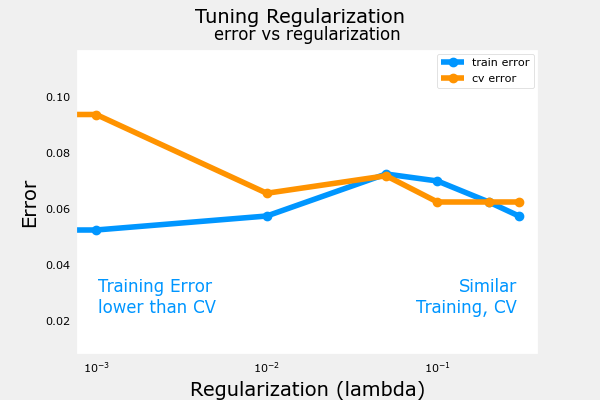

In [39]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

3/3 [==============================] - 0s 807us/step


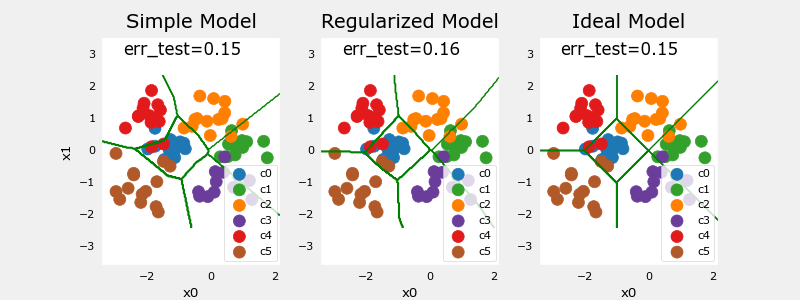

In [40]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)